# Hrv-covid19 Report
**Authors**: Zejun Bai, Yiqing Liu

**Updata Date**: 2024-9-23

**Required Packages**: pandas == 2.2.3, numpy == 1.26.4, sklearn == 1.5.2, matplotlib==3.9.2, seaborn==0.13.2, setuptools==75.1.0

**Python version**: 3.12.2

**Reference**: https://github.com/Welltory/hrv-covid19

# Data Context
## Background
This dataset is part of the open COVID-19 research initiated by Welltory ino tested positive fo 2020. The aim was to detect patterns related to the progression and recovery from COVID-19 using wearable health data. Participants with positive COVID-19 tracked their symptoms and heart rate variability (HRV) through the Welltory app.

## Data Sources
- **Heart rate variability measurements**: Tracking heart rate using photoplethysmography (PPG) through smartphone cameras with a high resolution or Bluetooth-enabled heart rate monitors .
- **Symptom Reports**: Users provided self-reported symptoms, test results, and clinically validated health assessments.
- **Uer-connected gadgets**: Data from Google Fit and Apple Health, capturing various physiological and activity metrics.
r's result.

# Data Sampling
In this report, we use stratified sampling based on the user_code. Because the amount of data per participant varies. In order to make sure we have the information on every participant, we decide to use stratified sampling based on their user_code. We first count the amount of corresponding data for each participant then sample data according to proportions. In this dataset, every file has the 'user_code' column, so we can perform the same operation on each file. The code example is as follows:
```python
from sklearn.model_selection import train_test_split
import pandas as pd

# examples
data = pd.read_csv('data/example.csv')

# stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

In [39]:
# importing required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# loading the dataset
blood_pressure = pd.read_csv('data/blood_pressure.csv')
heart_rate = pd.read_csv('data/heart_rate.csv')
hrv_measurements = pd.read_csv('data/hrv_measurements.csv')
participants = pd.read_csv('data/participants.csv')
scales_description = pd.read_csv('data/scales_description.csv')
sleep = pd.read_csv('data/sleep.csv')
surveys = pd.read_csv('data/surveys.csv')
wearables = pd.read_csv('data/wearables.csv')
weather = pd.read_csv('data/weather.csv')

# Data Structure
The followings are the specific analysis code of the data structure. We select HRV Measurements and Participants to analyze.
## **HRV Measurements (hrv_measurements.csv)**
This file contains heart rate variability (HRV) data collected from participants and related information using bluetooth-enabled heart rate monitor  or smartphones. 
- **user_code**: Unique user ID.
- **rr_code**: Unique measurement ID.
- **measurement_datetime**: Measurement date and time in `YYYY-MM-DD hh:mm:ss` format.
- **time_of_day**: Time of day during measurement ('evening', 'morning', 'night', 'day').
- **bpm**: Heart rate in beats per minute (BPM).
- **meanrr**: Average time between heartbeats (milliseconds).
- **mxdmn**: Difference between the highest and lowest cardio interval values (seconds).
- **sdnn**: Standard deviation of normal heartbeat intervals (milliseconds).
- **rmssd**: Root mean square of successive differences between heartbeats (milliseconds).
- **pnn50**: Percentage of RR intervals exceeding 50 ms (%) from the average.
- **mode**: Most common cardio interval length (milliseconds).
- **amo**: Mode amplitude (%) per 50 milliseconds.
- **lf**: Power of low-frequency waves (milliseconds²).
- **vlf**: Power of very low-frequency waves (milliseconds²).
- **lfhf**: Ratio of low-to-high frequency waves.
- **total_power**: Total power from LF, HF, and VLF waves (milliseconds²).
- **how_feel**: Self-reported physical health after the measurement.
- **how_mood**: Self-reported mood after the measurement.
- **how_sleep**: Self-reported sleep quality after the measurement.
- **rr_data**: Consecutive RR intervals in milliseconds (comma-separated).
- **tags**: User-assigned tags (comma-separated).

In [6]:
# View the shape of the hr_measurements data
print(f'The shape of hr_measurements: {hrv_measurements.shape}')
print("\n")
# View the column names and data types
print('Data type of the columns of hr_measurements')
display(hrv_measurements.dtypes)
print("\n")
# View the first few rows of the data
print("Head of the data of hr_measurements")
display(hrv_measurements.head())

The shape of hr_measurements: (3245, 22)


Data type of the columns


user_code                object
rr_code                  object
measurement_datetime     object
time_of_day              object
bpm                       int64
meanrr                  float64
mxdmn                   float64
sdnn                    float64
rmssd                   float64
pnn50                   float64
mode                    float64
amo                     float64
lf                      float64
hf                      float64
vlf                     float64
lfhf                    float64
total_power             float64
how_feel                  int64
how_mood                  int64
how_sleep               float64
tags                     object
rr_data                  object
dtype: object



Missing values in the columns


user_code                  0
rr_code                    0
measurement_datetime       0
time_of_day                0
bpm                        0
meanrr                     0
mxdmn                      0
sdnn                       0
rmssd                      0
pnn50                      0
mode                       0
amo                        0
lf                         0
hf                         0
vlf                        0
lfhf                       0
total_power                0
how_feel                   0
how_mood                   0
how_sleep               1779
tags                    1044
rr_data                    0
dtype: int64

Head of the data


,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,...,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.90,0.12,45.802,54.174,15.15,...,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep...,"819,1008,831,847,785,778,866,839,801,793,846,8..."
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70,858.00,0.11,32.889,33.022,16.16,...,409.0,310.0,176.0,1.319,895.0,0,0,0.0,NaN,"888,775,811,883,890,894,894,899,893,889,890,83..."
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83,724.10,0.17,54.811,65.987,17.17,...,432.0,881.0,194.0,0.490,1507.0,-1,-2,NaN,COVID-19; Fast/Diet; Hungry; Tired; Fever; I c...,"694,832,642,801,751,716,737,742,773,760,701,73..."
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75,802.64,0.20,72.223,70.039,22.22,...,814.0,1487.0,1719.0,0.547,4020.0,0,0,NaN,NaN,"821,817,771,805,833,788,747,724,792,825,775,75..."
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,...,489.0,128.0,96.0,3.820,713.0,0,0,0.0,NaN,"741,740,734,737,740,731,751,747,745,728,747,76..."


### Data Shape
- **Rows**: 3,245
- **Columns**: 22

### Column Data Types
- **Object Type**:
  - `user_code`
  - `rr_code`
  - `measurement_datetime`
  - `time_of_day`
  - `tags`
  
- **Float64 Type**:
  - `meanrr` (Mean RR interval)
  - `mxdmn` (Maximum-to-minimum RR interval ratio)
  - `sdnn` (Standard deviation of NN intervals)
  - `rmssd` (Root mean square of successive differences)
  - `pnn50` (Percentage of differences between successive NN intervals greater than 50ms)
  - `mode` (Mode of NN intervals)
  - `amo` (Amplitude of mode)
  - `lf` (Low-frequency power)
  - `hf` (High-frequency power)
  - `vlf` (Very low-frequency power)
  - `lfhf` (LF/HF ratio)
  - `total_power`
  - `how_sleep` (Subjective sleep quality)
  
- **Int64 Type**:
  - `bpm` (Beats per minute)
  - `how_feel` (Subjective feeling)
  - `how_mood` (Subjective mood)

This dataset appears to track heart rate variability (HRV) measurements along with subjective well-being indicators. The first two columns represents the unique code of participants, the following two columns represents the concrete day and time of measurement. The rest columns represents different metrics of heart measurement.

## **Participants (participants.csv)**
This file contains the general information of the participants of this research.
- **user_code**: Unique user ID.
- **gender**: Participant's gender (m/f/other or empty).
- **age_range**: Age range of the participant.
- **city**: City of residence.
- **country**: Country of residence.
- **height**: Participant’s height (cm).
- **weight**: Participant’s weight (kg).
- **symptoms_onset**: The onset date of symptoms, in `MM/DD/YYYY` format.


In [12]:
# View the shape of the participants data
print(f'The shape of participants: {participants.shape}')
print("\n")
# View the column names and data types
print('Data type of the columns of participants')
display(participants.dtypes)
print("\n")
# View the first few rows of the data
print("Head of the data of participants")
display(participants.head())

The shape of participants: (185, 8)


Data type of the columns of participants


user_code          object
gender             object
age_range          object
city               object
country            object
height            float64
weight            float64
symptoms_onset     object
dtype: object



Head of the data of participants


,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020


### Data Shape
- **Rows**: 185
- **Columns**: 8

### Column Data Types
- **Object Type**:
  - `user_code` (Unique participant identifier)
  - `gender` (Gender of the participant)
  - `age_range` (Age range of the participant)
  - `city` (City of residence)
  - `country` (Country of residence)
  - `symptoms_onset` (Date of onset of symptoms)
  
- **Float64 Type**:
  - `height` (Participant's height in cm)
  - `weight` (Participant's weight in kg)

### Summary
  This dataset tracks basic demographic and health-related data for participants, including gender, age range, living city and country, height, weight, and the onset date of symptoms.

# Descriptive Statistics
We describe the data in terms of count, mean, std, max, min and quartile. We choose heart_rate and blood_pressure as samples to analyze.
## **Blood _pressure (blood_pressure.csv)**
This file contains blood pressure data and derivatives.
- **user_code**: Unique user ID.
- **measurement_datetime**: Measurement date and time in `YYYY-MM-DD hh:mm:ss` format.
- **diastolic**: Diastolic blood pressure (millimeters of mercury).
- **systolic**: Systolic blood pressure (millimeters of mercury).
- **functional_changes_index**: FCI blood index — assesses body adaptability to stressors, considering height, weight, and gender.
- **circulatory_efficiency**: BCE blood index — measures blood circulation efficiency based on blood pressure readings.
- **kerdo_vegetation_index**: Balance between stress and recovery based on blood pressure.
- **robinson_index**: Cardiovascular capacity based on systolic blood pressure.

In [12]:
# Descriptive statistics of blood_pressure
print("Descriptive statistics of blood_pressure: ")
display(blood_pressure.describe())

Descriptive statistics: 


,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep
count,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,3245.000000,1466.000000
mean,73.257935,839.600366,0.184635,52.489218,52.814196,20.615609,0.837465,46.788290,927.038213,1125.041294,578.229892,2.397769,2630.309399,-0.235439,-0.076733,-0.065484
std,12.201088,137.420367,0.107456,29.369506,39.353213,18.588156,0.144769,16.418873,1455.424089,2490.540413,876.679652,5.750760,3912.247496,0.706262,0.655032,0.708656
min,44.000000,477.730000,0.030000,9.515000,6.340000,0.000000,0.475000,12.000000,2.000000,4.000000,1.000000,0.032000,44.000000,-2.000000,-2.000000,-2.000000
25%,65.000000,742.490000,0.110000,32.585000,28.985000,6.060000,0.725000,35.000000,151.000000,158.000000,116.000000,0.399000,620.000000,-1.000000,0.000000,0.000000
50%,72.000000,829.100000,0.160000,46.919000,42.869000,16.160000,0.825000,45.000000,423.000000,380.000000,293.000000,0.862000,1387.000000,0.000000,0.000000,0.000000
75%,81.000000,925.933000,0.220000,64.406000,62.485000,29.290000,0.925000,57.000000,1059.000000,993.000000,693.000000,1.966000,2906.000000,0.000000,0.000000,0.000000
max,125.000000,1346.740000,0.790000,206.631000,310.800000,91.920000,1.325000,98.000000,15522.000000,33490.000000,18468.000000,105.625000,41118.000000,2.000000,2.000000,2.000000


### Descriptive Statistics for Select Variables

| Metric        | bpm      | meanrr   | mxdmn    | sdnn     | rmssd    | pnn50    | mode     | amo      | lf       | hf       | vlf      | lfhf     | total_power | how_feel | how_mood | how_sleep |
|---------------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|-------------|----------|----------|-----------|
| **Count**     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245     | 3245        | 3245     | 3245     | 1466      |
| **Mean**      | 73.26    | 839.60   | 0.1846   | 52.49    | 52.81    | 20.62    | 0.8375   | 46.79    | 927.04   | 1125.04  | 578.23   | 2.40     | 2630.31     | -0.235   | -0.0777  | -0.0655   |
| **Std**       | 12.20    | 137.42   | 0.1075   | 29.37    | 39.35    | 18.59    | 1.1447   | 16.42    | 1455.42  | 2490.54  | 876.68   | 5.75     | 3912.25     | 0.706    | 0.655    | 0.7087    |
| **Min**       | 44.00    | 477.73   | 0.03     | 9.52     | 6.34     | 0.00     | 0.4750   | 12.00    | 2.00     | 4.00     | 1.00     | 0.032    | 44.00       | -2.00    | -2.00    | -2.00     |
| **25%**       | 65.00    | 742.49   | 0.11     | 32.59    | 28.99    | 6.06     | 0.7250   | 35.00    | 151.00   | 158.00   | 116.00   | 0.399    | 620.00      | -1.00    | 0.00     | 0.00      |
| **50%**       | 72.00    | 829.10   | 0.16     | 46.92    | 42.87    | 16.16    | 0.8250   | 45.00    | 423.00   | 380.00   | 293.00   | 0.862    | 1387.00     | 0.00     | 0.00     | 0.00      |
| **75%**       | 81.00    | 925.93   | 0.22     | 64.41    | 62.49    | 29.29    | 0.9250   | 57.00    | 1059.00  | 993.00   | 693.00   | 1.966    | 2906.00     | 0.00     | 0.00     | 0.00      |
| **Max**       | 125.00   | 1346.74  | 0.79     | 206.63   | 310.80   | 91.92    | 3.3250   | 98.00    | 15522.00 | 33490.00 | 18468.00 | 105.63   | 41118.00    | 2.00     | 2.00     | 2.00      |

This dataset provides key insights into heart rate variability (HRV) and subjective well-being for 3,245 participants. The physiological metrics, including bpm, mean RR interval, and HRV measures like sdnn and rmssd, show moderate variability among participants, with notable extremes in frequency domain metrics (lf, hf, vlf). The lf/hf ratio, an indicator of autonomic balance, highlights potential stress-related conditions for some individuals. Subjective metrics like how participants feel, their mood, and sleep quality reveal generally neutral or slightly negative self-perceptions, with significant variability in sleep quality across 1,466 entries. The combination of HRV and emotional data makes this dataset valuable for studying correlations between physiological and psychological health, offering a detailed look at individual differences and autonomic balance.

## **Heart_rate (heart_rate.csv)**
This file contains raw heart rate intervals.
- **user_code**: Unique user ID.
- **daytime**: Measurement date and time in `YYYY-MM-DD hh:mm:ss` format.
- **heart_rate**: Heart rate in beats per minute (BPM).
- **is_resting**: Indicator of whether the heart rate was measured during rest (e.g., True/False).

In [9]:
# Descriptive statistics of heart_rate
print("Descriptive statistics of heart_rate: ")
display(heart_rate.describe())

Descriptive statistics of heart_rate: 


,heart_rate,is_resting
count,523783.000000,523783.000000
mean,90.856626,0.005546
std,25.054152,0.074266
min,10.000000,0.000000
25%,71.000000,0.000000
50%,87.000000,0.000000
75%,108.000000,0.000000
max,232.000000,1.000000


### Descriptive Statistics of Heart Rate

| Metric         | heart_rate | is_resting |
|----------------|------------|------------|
| **Count**      | 523,783    | 523,783    |
| **Mean**       | 90.86      | 0.0055     |
| **Std Dev**    | 25.05      | 0.0743     |
| **Min**        | 10.00      | 0.00       |
| **25%**        | 71.00      | 0.00       |
| **50% (Median)** | 87.00      | 0.00       |
| **75%**        | 108.00     | 0.00       |
| **Max**        | 232.00     | 1.00       |

### Summary:
This dataset provides descriptive statistics for 523,783 records of heart rate and whether the participant was resting (binary variable). The mean heart rate is 90.86 bpm, with a standard deviation of 25.05 bpm, suggesting a broad range of heart rates. The minimum heart rate recorded is 10 bpm, and the maximum is 232 bpm, which could indicate either extreme physical activity or outliers in the data. The resting state indicator (is_resting) shows that only a very small portion of the data points (0.55%) were recorded during resting conditions, as the median value is 0. This suggests the majority of heart rate measurements were taken during non-resting activities.

# Data Quality
In this part, we check for missing values, duplicates, outliers and data consistency. We choose wearables and sleep as samples to analyze.
## **Wearables (wearables.csv)**
- **user_code**: Unique user ID.
- **day**: Measurement date in `YYYY-MM-DD` format.
- **resting_pulse**: Resting heart rate in beats per minute (BPM).
- **pulse_average**: Average heart rate in BPM.
- **pulse_min**: Minimum heart rate in BPM.
- **pulse_max**: Maximum heart rate in BPM.
- **average_spo2_value**: Oxygen saturation percentage (%).
- **body_temperature_avg**: Average body temperature in °C.
- **stand_hours_total**: Total hours spent standing (hours).
- **steps_count**: Number of steps taken.
- **distance**: Walking and running distance in meters.
- **steps_speed**: Step cadence (steps per minute).
- **total_number_of_flights_climbed**: Number of flights of stairs climbed.
- **active_calories_burned**: Active calories burned (kilocalories).
- **basal_calories_burned**: Basal calories burned (kilocalories).
- **total_calories_burned**: Total calories burned (kilocalories).
- **average_headphone_exposure**: Average headphone audio level (decibels).
- **average_environment_exposure**: Average environmental sound level (decibels).

Missing values in the columns of wearables


user_code                             0
day                                   0
resting_pulse                      1583
pulse_average                      1009
pulse_min                          1009
pulse_max                          1009
average_spo2_value                 3058
body_temperature_avg               3033
stand_hours_total                  2567
steps_count                        1130
distance                           1229
steps_speed                        1680
total_number_of_flights_climbed    1863
active_calories_burned             1898
basal_calories_burned                 1
total_calories_burned                 1
average_headphone_exposure         2868
average_environment_exposure       2949
dtype: int64

Duplicates in the columns of wearables
0


Boxplots for the columns of wearables


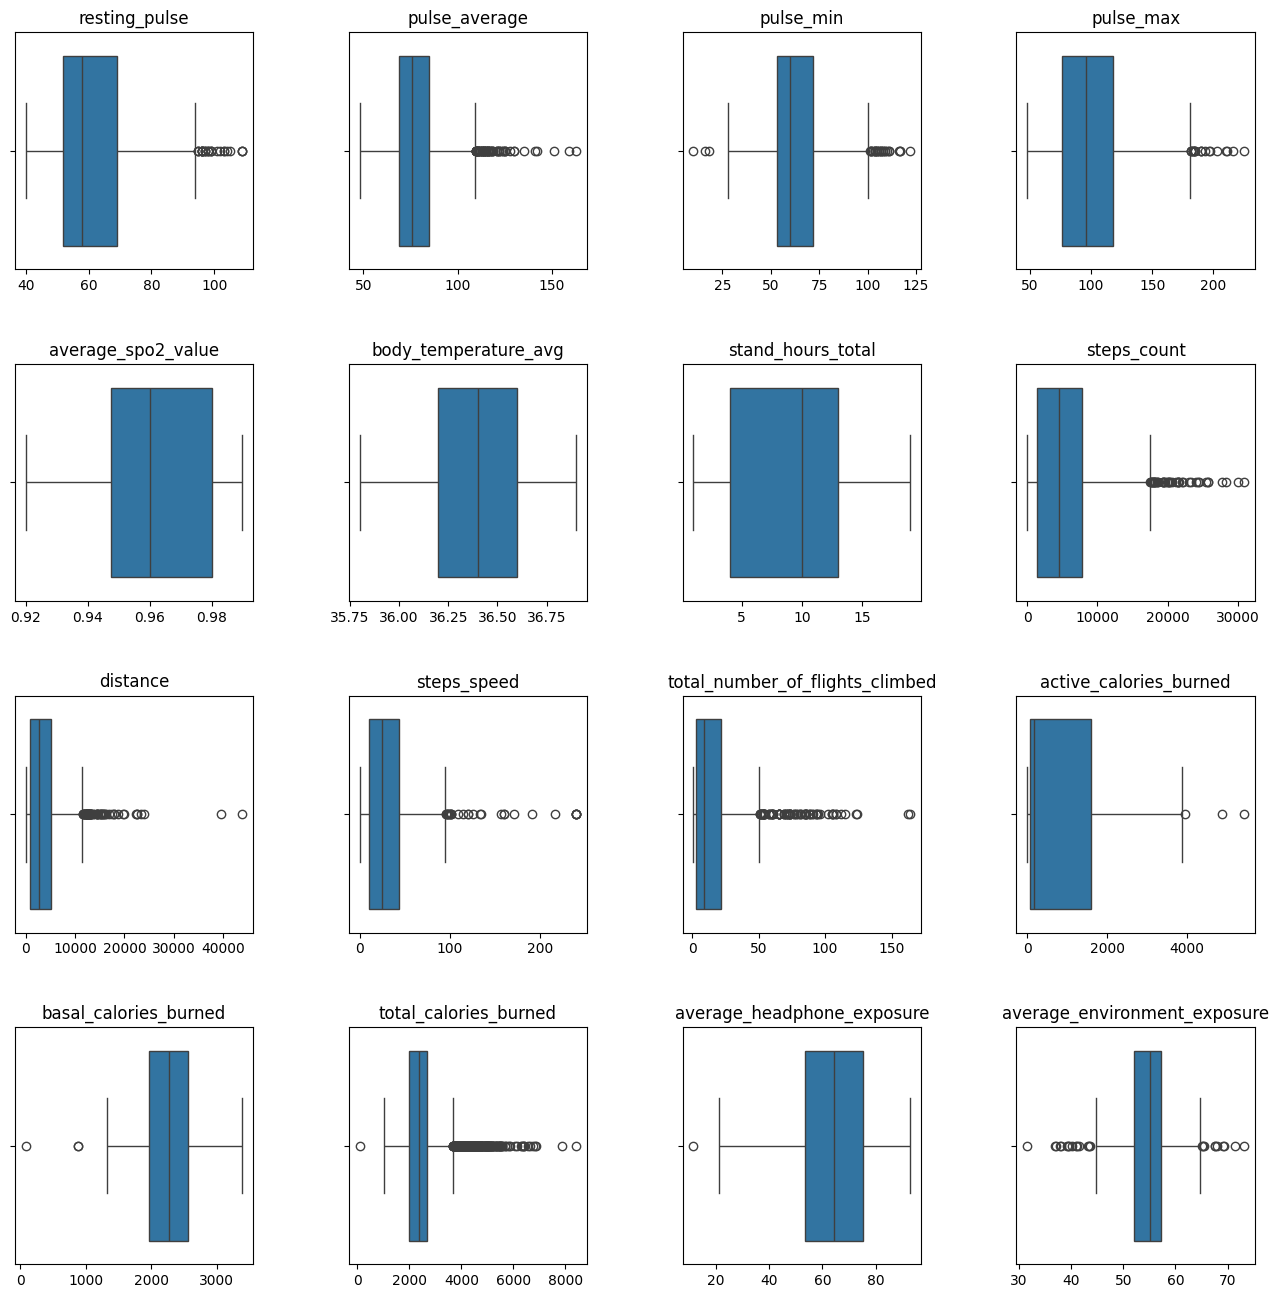

Outliers of resting_pulse of wearables


,resting_pulse
615,97.0
684,103.0
755,101.0
1071,102.0
1132,95.0
1155,95.0
1189,98.0
1749,103.0
2052,99.0
2215,99.0


Number of outliers in the columns of wearables


,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,27,67,31,20,0,0,0,44,66,28,87,3,3,324,1,25


In [17]:
# Check for missing values of wearables
print('Missing values in the columns of wearables')
display(wearables.isnull().sum())

# Check for duplicates of wearables
print('Duplicates in the columns of wearables')
print(wearables.duplicated().sum())
print('\n')

# Check for outliers of wearables
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

print('Boxplots for the columns of wearables')
for i, col in enumerate(wearables.columns[2:]): 
    row = i // 4  
    col_idx = i % 4  
    sns.boxplot(data=wearables, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].set(xlabel=None)  
plt.show()

# load the outliers of wearables    
outliers_dict = {}

for col in wearables.columns[2:]:
    Q1 = wearables[col].quantile(0.25)
    Q3 = wearables[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = wearables[(wearables[col] < lower_bound) | (wearables[col] > upper_bound)][col]
    outliers_dict[col] = pd.DataFrame(outliers)

# View the outliers of wearables, select the column which you want to view the outliers
print(f'Outliers of {wearables.columns[2]} of wearables')
display(outliers_dict[wearables.columns[2]])

# Check the number of outliers of wearables
outliers_count = pd.DataFrame()
for key, value in outliers_dict.items():
    outliers_count[key] = [len(value)]
    
print('Number of outliers in the columns of wearables')
display(outliers_count)



### Missing Values in Wearables Columns
The wearable dataset shows missing values across several columns:
- **resting_pulse**: 1,583 missing values
- **pulse_average, pulse_min, pulse_max**: 1,009 missing values each
- **average_spo2_value**: 3,058 missing values
- **body_temperature_avg**: 3,033 missing values
- **stand_hours_total**: 2,567 missing values
- **steps_count**: 1,130 missing values
- **distance**: 1,229 missing values
- **steps_speed**: 1,680 missing values
- **total_number_of_flights_climbed**: 1,863 missing values
- **active_calories_burned**: 1,898 missing values
- **basal_calories_burned and total_calories_burned**: 1 missing value each
- **average_headphone_exposure**: 2,868 missing values
- **average_environment_exposure**: 2,949 missing values

### Boxplots Overview
The boxplots provide insights into the distribution of key wearable metrics:
- **Pulse measurements (resting, average, min, max)**: Pulse metrics show a wide range, with several outliers, particularly in **pulse_min** and **pulse_max**.
- **Average SPO2 and body temperature**: These values are relatively stable with few outliers, indicating that most participants' measurements fall within the expected range.
- **Activity-related metrics** (steps_count, distance, steps_speed, flights climbed): These show substantial variability with several outliers, indicating a broad range of activity levels among participants.
- **Calories burned** (active, basal, total): A few outliers exist, particularly for **total_calories_burned**, but the majority of data points are concentrated within expected ranges.
- **Headphone and environment exposure**: Both show significant outliers, particularly for **average_environment_exposure**, suggesting varying levels of exposure among users.
### Outliers of resting pulse
The outliers for **resting_pulse** range from values such as **95.0 bpm** to **109.0 bpm**, indicating possible instances of elevated resting heart rates.
### Outliers count
The outliers table indicate the number of outliers of each column.

## **Sleep (sleep.csv)**
This file contains data about user sleep collected from supported gadgets and aggregated by day
- **user_code**: Unique user ID.
- **day**: Measurement date in `YYYY-MM-DD` format.
- **sleep_begin**: Sleep start date and time in `YYYY-MM-DD hh:mm:ss` format.
- **sleep_end**: Sleep end date and time in `YYYY-MM-DD hh:mm:ss` format.
- **sleep_duration**: Total time spent asleep (hours).
- **sleep_awake_duration**: Time spent awake while in bed (hours).
- **sleep_rem_duration**: Time spent in REM sleep (hours).
- **sleep_light_duration**: Time spent in light sleep (hours).
- **sleep_deep_duration**: Time spent in deep sleep (hours).
- **pulse_min**: Minimum heart rate during sleep (beats per minute).
- **pulse_max**: Maximum heart rate during sleep (beats per minute).
- **pulse_average**: Average heart rate during sleep (beats per minute).

Missing values in the columns of sleep


user_code                 0
day                       0
sleep_begin               0
sleep_end                 0
sleep_duration            0
sleep_awake_duration    416
sleep_rem_duration      418
sleep_light_duration    398
sleep_deep_duration     411
pulse_min               410
pulse_max               410
pulse_average           410
dtype: int64

Duplicates in the columns of sleep
0


Boxplots for the columns of sleep


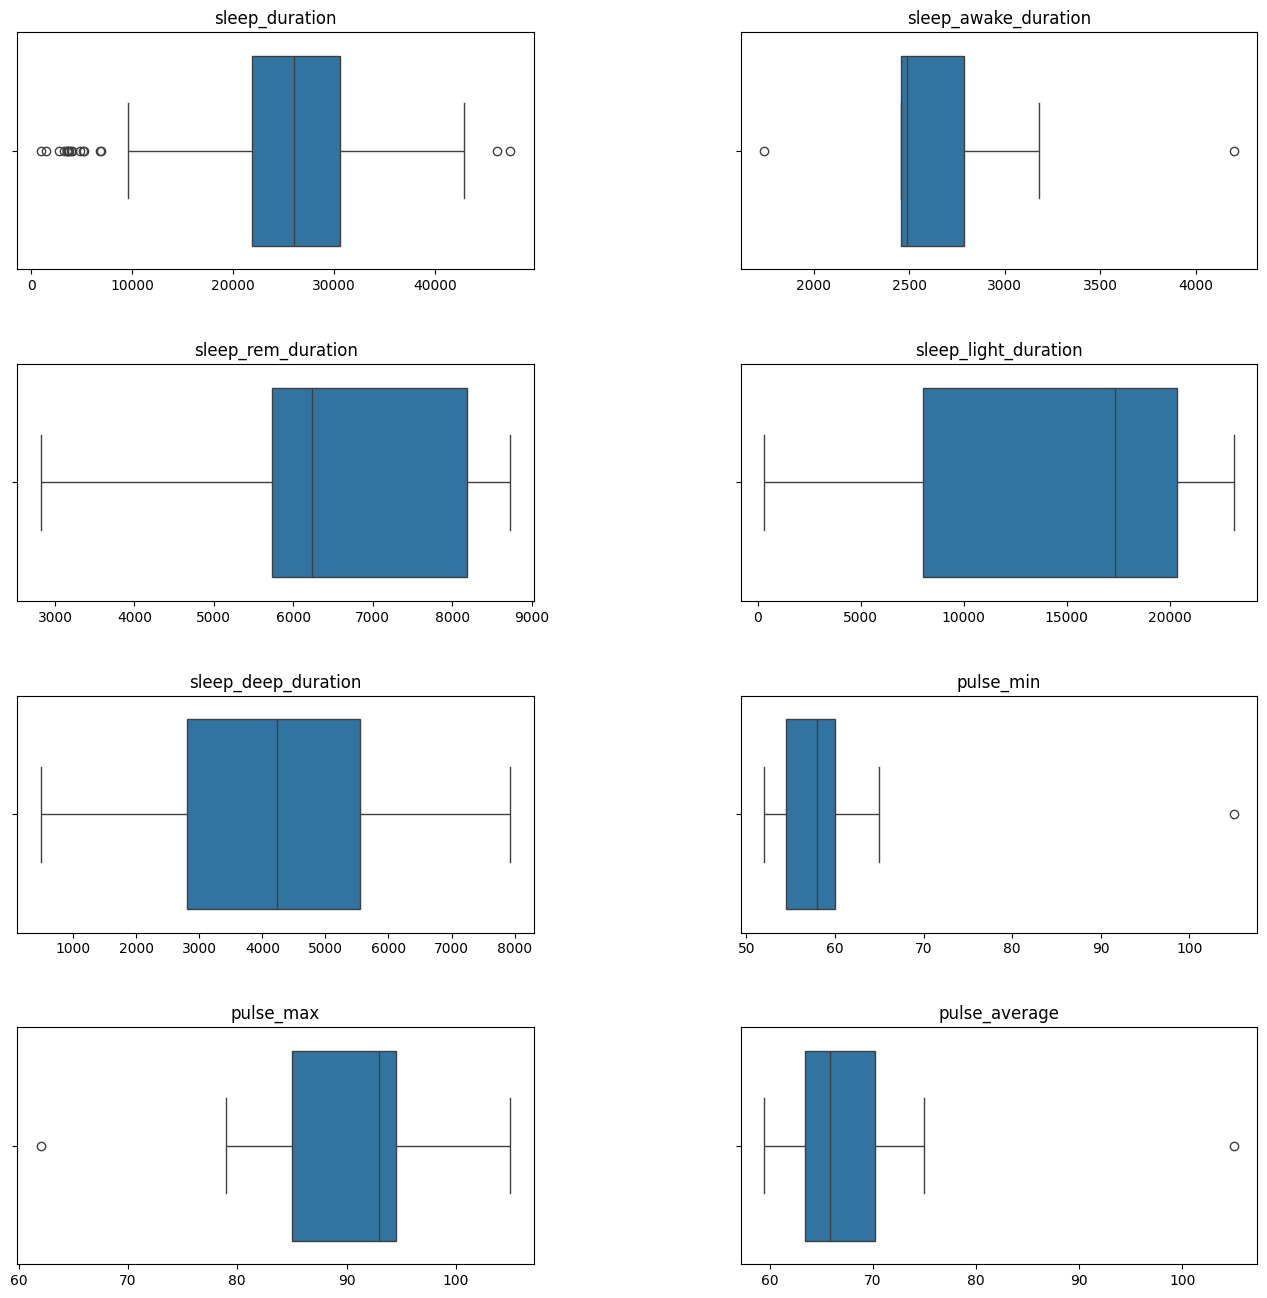

Outliers of sleep_duration of wearables


,sleep_duration
0,3290.0
18,1491.0
21,930.0
22,3757.0
23,4036.0
179,5130.0
180,5235.0
188,3579.0
189,6771.0
190,3539.0


Number of outliers in the columns of sleep


,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,17,2,0,0,0,1,1,1


In [11]:
# Check for missing values of sleep
print('Missing values in the columns of sleep')
display(sleep.isnull().sum())

# Check for duplicates of sleep
print('Duplicates in the columns of sleep')
print(sleep.duplicated().sum())
print('\n')

# Check for outliers of sleep
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

print('Boxplots for the columns of sleep')
for i, col in enumerate(sleep.columns[4:]): 
    row = i // 2  
    col_idx = i % 2  
    sns.boxplot(data=sleep, x=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].set(xlabel=None)  
plt.show()

# load the outliers of sleep    
outliers_dict = {}

# The first four columns are not numerical, so we start to calculate the outliers from the fifth column
for col in sleep.columns[4:]:
    Q1 = sleep[col].quantile(0.25)
    Q3 = sleep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = sleep[(sleep[col] < lower_bound) | (sleep[col] > upper_bound)][col]
    outliers_dict[col] = pd.DataFrame(outliers)

# View the outliers of sleep, select the column which you want to view the outliers
print(f'Outliers of {sleep.columns[4]} of wearables')
display(outliers_dict[sleep.columns[4]])

# Check the number of outliers of sleep
outliers_count = pd.DataFrame()
for key, value in outliers_dict.items():
    outliers_count[key] = [len(value)]
    
print('Number of outliers in the columns of sleep')
display(outliers_count)

# Sleep Data Summary

### Missing Values in Sleep Columns
The sleep dataset shows missing values across several columns:
- **sleep_awake_duration**: 416 missing values
- **sleep_rem_duration**: 418 missing values
- **sleep_light_duration**: 398 missing values
- **sleep_deep_duration**: 411 missing values
- **pulse_min, pulse_max, pulse_average**: 410 missing values each

Other columns like **sleep_begin**, **sleep_end**, and **sleep_duration** have no missing values.

### Boxplots Overview
The boxplots provide insights into the distribution of sleep metrics:
- **Sleep Duration**: Shows a wide range, with some significant outliers. Most participants fall within a typical sleep duration, but a few exhibit very short or very long sleep durations.
- **Sleep Awake Duration**: This metric shows a much more compact distribution with fewer outliers, but the range still includes instances of unusually long awake times.
- **REM, Light, and Deep Sleep Durations**: The distribution of these sleep phases shows that most participants have reasonable amounts of each phase, with slight variability. Deep sleep is the most stable, while light sleep shows a broader distribution.
- **Pulse Min, Max, and Average**: These pulse-related metrics are mostly consistent, but the boxplots highlight a few outliers, particularly in **pulse_average**.

### Outliers in Sleep Duration
The outliers for **sleep_duration** show several extreme cases, such as participants with durations of **46,170** and **47,460 seconds**, indicating unusually long sleep times. These may represent irregular sleep patterns or data errors.

### Number of Outliers in Sleep Columns
- **sleep_duration**: 0 outliers
- **sleep_awake_duration**: 17 outliers
- **sleep_rem_duration, sleep_light_duration, sleep_deep_duration**: 0 outliers each
- **pulse_min, pulse_max, pulse_average**: 1 outlier each

# Variable Relationship
In this part, we choose wearables and weather to analyze.

The blood pressure dataset is introduced before, thus we start to analyze the variable relationship of blood pressure directly.

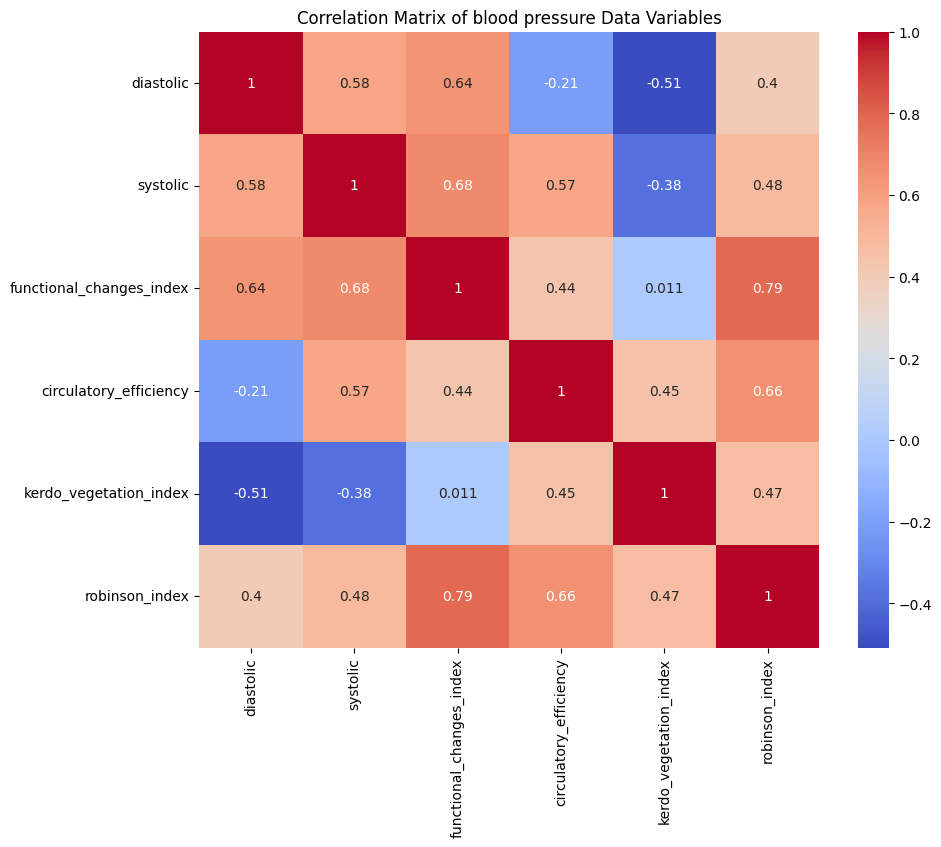

In [21]:
# Calculate correlation matrix for numeric variables, since the first two columns are not numerical and it is meaningless to calculate their relationships, we start from the third column
correlation_matrix = blood_pressure.iloc[:, 2:].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of blood pressure Data Variables')
plt.show()

### Correlation Matrix of Blood Pressure Data Variables

The correlation matrix provides a visual representation of the relationships between several variables related to blood pressure and cardiovascular efficiency. Correlation values range from **-1** (strong negative correlation) to **1** (strong positive correlation), with **0** indicating no relationship. Key observations include:

- **Diastolic and Systolic** blood pressure have a **0.58** correlation, indicating a moderate positive relationship. As one increases, the other tends to increase as well.
- **Functional Changes Index** shows strong positive correlations with both **diastolic** (0.64) and **systolic** (0.68) pressures, suggesting that as blood pressure increases, the functional changes in the body increase significantly.
- **Circulatory Efficiency** has a moderate correlation with **systolic** (0.57) and **functional_changes_index** (0.44), but a slight negative correlation with **diastolic** (-0.21), indicating it improves with higher systolic pressure but not diastolic.
- **Kerdo Vegetation Index** is negatively correlated with both **diastolic** (-0.51) and **systolic** (-0.38) pressures, suggesting that an increase in blood pressure tends to reduce the kerdo vegetation index.
- **Robinson Index** is positively correlated with all variables, showing its strongest correlations with **functional changes index** (0.79) and **circulatory efficiency** (0.66), indicating that these variables tend to rise together.

### Summary:
The matrix highlights significant relationships between blood pressure (diastolic and systolic) and various cardiovascular indices. Strong positive correlations, particularly between the **Functional Changes Index** and blood pressure values, suggest that as blood pressure increases, the body experiences noticeable functional changes. In contrast, the **Kerdo Vegetation Index** shows negative correlations, indicating a decrease in this index with rising blood pressure.

## **Weather (weather.csv)**
This file contains data about weather conditions for user's location aggregated by day.
- **user_code**: Unique user ID.
- **day**: Measurement date in `YYYY-MM-DD` format.
- **avg_temperature_C**: Average outdoor air temperature in °C.
- **atmospheric_pressure**: Atmospheric pressure in millimeters of mercury (mmHg).
- **precip_intensity**: Precipitation intensity in millimeters per hour (mm/h).
- **humidity**: Outdoor humidity percentage (%).
- **clouds**: Cloudiness percentage (%).

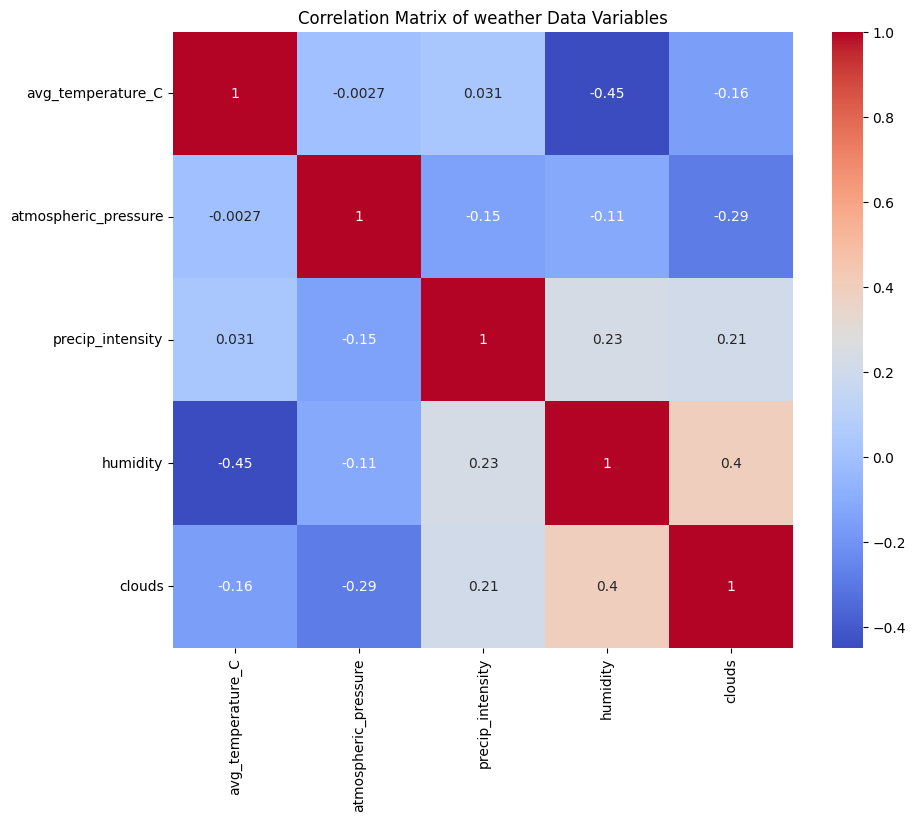

In [22]:
# Calculate correlation matrix for numeric variables, since the first two columns are not numerical and it is meaningless to calculate their relationships, we start from the third column
correlation_matrix = weather.iloc[:, 2:].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of weather Data Variables')
plt.show()

# Correlation Matrix of Weather Data Variables

The correlation matrix provides an overview of the relationships between various weather-related variables. Correlation values range from **-1** (strong negative correlation) to **1** (strong positive correlation), with **0** indicating no significant relationship. Key observations include:

- **Average Temperature (°C)**:
  - Has a **moderate negative correlation** with **humidity** (-0.45), indicating that higher temperatures are often associated with lower humidity.
  - Shows a **weak negative correlation** with **cloud cover** (-0.16) and **atmospheric pressure** (-0.0027), suggesting minimal relationships with these variables.
  
- **Atmospheric Pressure**:
  - Exhibits a weak **negative correlation** with **precipitation intensity** (-0.15), **humidity** (-0.11), and **cloud cover** (-0.29), indicating that as pressure decreases, precipitation, humidity, and cloud cover slightly increase.
  
- **Precipitation Intensity**:
  - Shows a **positive correlation** with **humidity** (0.23) and **cloud cover** (0.21), meaning higher precipitation intensity is linked with increased humidity and cloud cover.
  
- **Humidity**:
  - Displays a **strong positive correlation** with **cloud cover** (0.4), indicating that higher humidity is often associated with increased cloudiness.
  
- **Cloud Cover**:
  - Demonstrates moderate relationships with **humidity** (0.4) and **precipitation intensity** (0.21), meaning that cloudier conditions are linked with higher humidity and more intense precipitation.

### Summary:
This correlation matrix reveals that temperature and humidity have a moderate inverse relationship, with higher temperatures typically leading to lower humidity. Additionally, cloud cover and humidity are closely linked, and increased precipitation intensity tends to coincide with higher humidity and more cloud cover. Overall, the matrix highlights important interactions between temperature, humidity, precipitation, and cloud cover, which are critical for understanding weather patterns.

# Visualizion of datasets
In this part, we choose to visualize the corresponding relationship between meanrr and mxdmn of hrv measurement, and diastolic for two individuals of blood presssure.

Text(0, 0.5, 'Mxdmn')

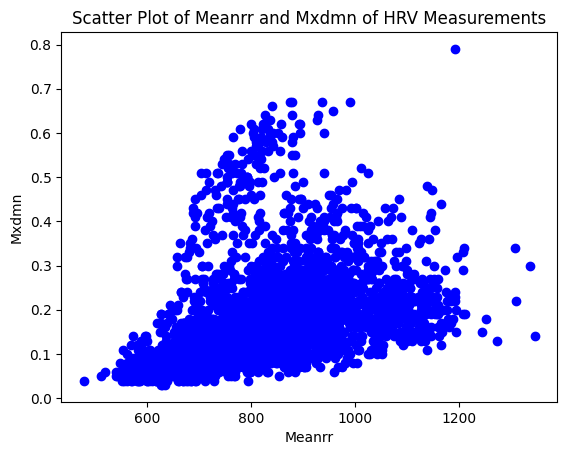

In [23]:
# Create a scatter plot of meanrr and mxdmn
plt.scatter(hrv_measurements['meanrr'], hrv_measurements['mxdmn'], color='blue')

# Add title and labels
plt.title("Scatter Plot of Meanrr and Mxdmn of HRV Measurements")
plt.xlabel("Meanrr")
plt.ylabel("Mxdmn")

### Scatter Plot of Meanrr and Mxdmn of HRV Measurements

This scatter plot shows the relationship between **Meanrr** (the average RR interval, which is a measure of heart rate variability) and **Mxdmn** (the maximum difference between NN intervals). 

### Key Observations:
- **General Trend**: There appears to be a **positive correlation** between Meanrr and Mxdmn. As the Meanrr increases, Mxdmn tends to increase as well, though the relationship becomes more dispersed at higher values of Meanrr.
- **Clustered Data**: A large portion of the data points are clustered in the lower to mid-range of Meanrr (between 600 ms and 1000 ms), and Mxdmn values predominantly range between 0.1 and 0.6.
- **Outliers**: Some outlier points are visible at higher Meanrr values (above 1000 ms) and higher Mxdmn values (above 0.6), indicating potential unusual or extreme heart rate variability behavior in certain subjects.
- **Data Spread**: The spread of the data shows more variability in Mxdmn as Meanrr increases, suggesting that higher Meanrr is associated with a wider range of maximum NN interval differences.

Overall, the scatter plot reveals a moderately positive relationship between these two heart rate variability metrics, with some degree of variability and a few outliers.

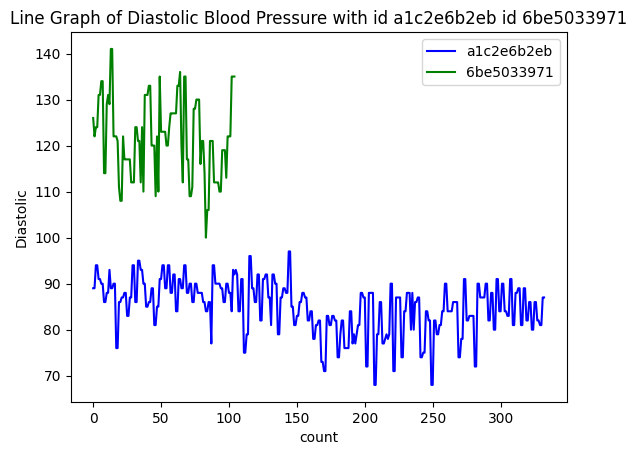

In [32]:
# Slect the data of diastolic with id 'a1c2e6b2eb' and '6be5033971' in blood_pressure dataset
filtered_blood_pressure_1 = blood_pressure[(blood_pressure.iloc[:, 0] == 'a1c2e6b2eb')]['diastolic']
filtered_blood_pressure_2 = blood_pressure[(blood_pressure.iloc[:, 0] == '6be5033971')]['systolic']
filtered_blood_pressure_1 = filtered_blood_pressure_1.reset_index(drop=True)
filtered_blood_pressure_2 = filtered_blood_pressure_2.reset_index(drop=True)
# Create a line graph and draw two lines of 'a1c2e6b2eb' and '6be5033971'
plt.plot(filtered_blood_pressure_1, label='a1c2e6b2eb', color='blue')  # First line
plt.plot(filtered_blood_pressure_2, label='6be5033971', color='green')  # Second line

# Add title and axis labels
plt.title('Line Graph of Diastolic Blood Pressure with id a1c2e6b2eb id 6be5033971')
plt.xlabel('count')
plt.ylabel('Diastolic')

# Show legend to distinguish between the two lines
plt.legend()

# Display the plot
plt.show()

### Diastolic Blood Pressure Line Graph Summary

This line graph displays diastolic blood pressure measurements for two individuals with the IDs `a1c2e6b2eb` (in blue) and `6be5033971` (in green).

### Key Observations:
- **X-axis** represents the count of measurements taken, starting from 0.
- **Y-axis** represents the diastolic blood pressure values.
- The **blue line** (ID `a1c2e6b2eb`) shows generally lower diastolic blood pressure values, mostly fluctuating between 70 and 90 mmHg.
- The **green line** (ID `6be5033971`) shows higher diastolic blood pressure values, typically ranging between 110 and 140 mmHg.

### Summary:
- The graph highlights the difference in diastolic blood pressure trends between the two individuals, with the second person (`6be5033971`) consistently having higher diastolic readings compared to the first (`a1c2e6b2eb`).

# Appropriate data transformation
In this part, we choose to transform the text of surveys to categorical variable using one-hot encoding and transform mxdnm of hrv measurements using min-max scaling.

## **Survey (survey.csv)**
- **user_code**: Unique user ID.
- **scale**: Survey code representing the type of survey taken (refer to 'Survey scale description' for details).
- **created_at**: Date when the user completed the survey, in `YYYY-MM-DD` format.
- **value**: Numeric result of the user's survey response.
- **text**: Text-based interpretation of the user's result.

In [37]:
# Transform the text column into one-hot encoding
text_one_hot = pd.get_dummies(surveys['text'], prefix='text')
display(text_one_hot)

,text_15% chance of developing Type 2 diabetes,text_4% chance of developing Type 2 diabetes,text_7 to 14 days,text_A 10% chance of developing coronary heart disease,text_Blood sugar is within the norm when taking the test,text_Eats healthy,text_Extremely severe,text_Is active enough,text_Less than 10% chance of developing coronary heart disease,text_Less than 3% chance of developing coronary heart disease,...,text_User has some of the symptoms associated with coronavirus,text_User has type 2 diabetes,text_User has varicose veins,text_User has vitamin D deficiency,text_User is a smoker,text_User isn’t experiencing symptom,text_User takes vitamins/nootropics,text_User’s hormones are out of balance,text_Very mild,text_Waist circumference is within the norm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [41]:
# Transform the mxdom column by Min-Max scaling
scaler = MinMaxScaler()
min_max_scale_maxdmn = scaler.fit_transform(hrv_measurements[['mxdmn']])
min_max_scale_maxdmn = pd.DataFrame(min_max_scale_maxdmn, columns=['mxdmn'])
display(min_max_scale_maxdmn)

,mxdmn
0,0.118421
1,0.105263
2,0.184211
3,0.223684
4,0.092105
...,...
3240,0.223684
3241,0.171053
3242,0.250000
3243,0.210526


In [2]:
blood_pressure = pd.read_csv('data/blood_pressure.csv')
heart_rate = pd.read_csv('data/heart_rate.csv')
hrv_measurements = pd.read_csv('data/hrv_measurements.csv')
participants = pd.read_csv('data/participants.csv')
scales_description = pd.read_csv('data/scales_description.csv')
sleep = pd.read_csv('data/sleep.csv')
surveys = pd.read_csv('data/surveys.csv')
wearables = pd.read_csv('data/wearables.csv')
weather = pd.read_csv('data/weather.csv')

data = [blood_pressure, heart_rate, hrv_measurements, participants, scales_description, sleep, surveys, wearables, weather]



# 查看数据的前几行
print(data.head())

# 查看数据的维度（行数、列数）
print(data.shape)

# 查看列名和数据类型
print(data.dtypes)

# 检查是否有缺失值
print(data.isnull().sum())

: 